In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Part 1: Python datetime Module with Clinical Data

The Python `datetime` module is the foundation of all temporal data handling. While pandas provides powerful abstractions, understanding the basics here is essential because you'll often need to parse timestamps, calculate time differences, and format dates for reports.

### Basic datetime Operations

In medical research, timestamps are everywhere - lab results, patient visits, medication administration times. The datetime module helps us work with these timestamps in a standardized way.

In [2]:
# Current time (for timestamping clinical records)
now = datetime.now()
print(f"Current time: {now}")

# Patient birth date
birth_date = datetime(1990, 5, 15)
print(f"Patient birth date: {birth_date}")

# Lab result timestamp (string parsing)
lab_timestamp = "2023-12-25 14:30:00"
parsed_timestamp = datetime.strptime(lab_timestamp, "%Y-%m-%d %H:%M:%S")
print(f"Lab timestamp: {parsed_timestamp}")

# Format for medical records
formatted = parsed_timestamp.strftime("%B %d, %Y at %I:%M %p")
print(f"Formatted for records: {formatted}")

# Calculate patient age (time differences)
age_days = now - birth_date
print(f"Patient age in days: {age_days.days}")
print(f"Patient age in years: {age_days.days / 365.25:.1f}")

Current time: 2025-11-11 21:05:45.960750
Patient birth date: 1990-05-15 00:00:00
Lab timestamp: 2023-12-25 14:30:00
Formatted for records: December 25, 2023 at 02:30 PM
Patient age in days: 12964
Patient age in years: 35.5


In clinical data, you often receive timestamps as strings from databases or CSV files. The `strptime()` function converts these strings into datetime objects that Python can work with. Similarly, `strftime()` formats datetime objects for reports or displays.

### datetime Arithmetic for Clinical Schedules

Clinical trials and patient monitoring require careful scheduling. The `timedelta` object allows us to calculate follow-up dates, trial durations, and schedule visits programmatically.

In [3]:
# Clinical trial timeline
trial_start = datetime(2023, 1, 1)
trial_end = datetime(2023, 12, 31)

# Calculate trial duration
duration = trial_end - trial_start
print(f"Trial duration: {duration.days} days ({duration.days / 30:.1f} months)")

# Calculate follow-up visit dates
visit_1 = trial_start + timedelta(days=30)  # 30-day follow-up
visit_2 = trial_start + timedelta(days=90)  # 90-day follow-up
visit_3 = trial_start + timedelta(weeks=26)  # 6-month follow-up

print(f"\nFollow-up visits:")
print(f"Visit 1 (30 days): {visit_1}")
print(f"Visit 2 (90 days): {visit_2}")
print(f"Visit 3 (6 months): {visit_3}")

# Business days for clinic visits (weekdays only)
clinic_days = pd.bdate_range(trial_start, trial_end)
print(f"\nClinic days in 2023: {len(clinic_days)}")

Trial duration: 364 days (12.1 months)

Follow-up visits:
Visit 1 (30 days): 2023-01-31 00:00:00
Visit 2 (90 days): 2023-04-01 00:00:00
Visit 3 (6 months): 2023-07-02 00:00:00

Clinic days in 2023: 260


The `timedelta` object makes calculating follow-up visit dates straightforward and reduces human error in scheduling.

## Part 2: pandas DatetimeIndex with Patient Data

While Python's datetime module is essential, pandas' `DatetimeIndex` is where time series analysis becomes truly powerful. The DatetimeIndex enables intuitive time-based selection, automatic frequency handling, and optimized time series operations.

### Creating DatetimeIndex from Lab Results

Converting date strings to a DatetimeIndex is one of the first steps in time series analysis. Once your data has a DatetimeIndex, you can select data by date ranges, resample to different frequencies, and perform time-based operations efficiently.

In [4]:
# Lab test dates (from clinical records)
lab_test_dates = [
    "2023-01-01",
    "2023-01-08",
    "2023-01-15",
    "2023-01-22",
    "2023-01-29",
]
dates = pd.to_datetime(lab_test_dates)
print("Lab test dates:")
print(dates)

# Create date range for daily patient monitoring
monitoring_dates = pd.date_range("2023-01-01", periods=30, freq="D")
print(f"\nDaily monitoring dates (30 days):")
print(monitoring_dates[:5])
print("...")
print(monitoring_dates[-5:])

# Create DataFrame with daily vital signs
vital_signs = pd.DataFrame(
    {
        "temperature": np.random.normal(98.6, 0.5, 30),
        "heart_rate": np.random.randint(60, 100, 30),
        "blood_pressure_systolic": np.random.randint(110, 140, 30),
        "blood_pressure_diastolic": np.random.randint(70, 90, 30),
    },
    index=monitoring_dates,
)

print("\nVital signs DataFrame:")
print(vital_signs.head())
print(f"\nDate range: {vital_signs.index.min()} to {vital_signs.index.max()}")

Lab test dates:
DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq=None)

Daily monitoring dates (30 days):
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')
...
DatetimeIndex(['2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30'],
              dtype='datetime64[ns]', freq='D')

Vital signs DataFrame:
            temperature  heart_rate  blood_pressure_systolic  \
2023-01-01    98.848357          79                      135   
2023-01-02    98.530868          87                      134   
2023-01-03    98.923844          66                      137   
2023-01-04    99.361515          67                      137   
2023-01-05    98.482923          94                      137   

            blood_pressure_diastolic  
2023-01-01                        78  
2023-01-02

Notice how `pd.to_datetime()` automatically converts strings to datetime objects. The `pd.date_range()` function is incredibly powerful - it can generate regular sequences of dates with any frequency (daily, hourly, weekly, etc.), which is essential for creating time series data.

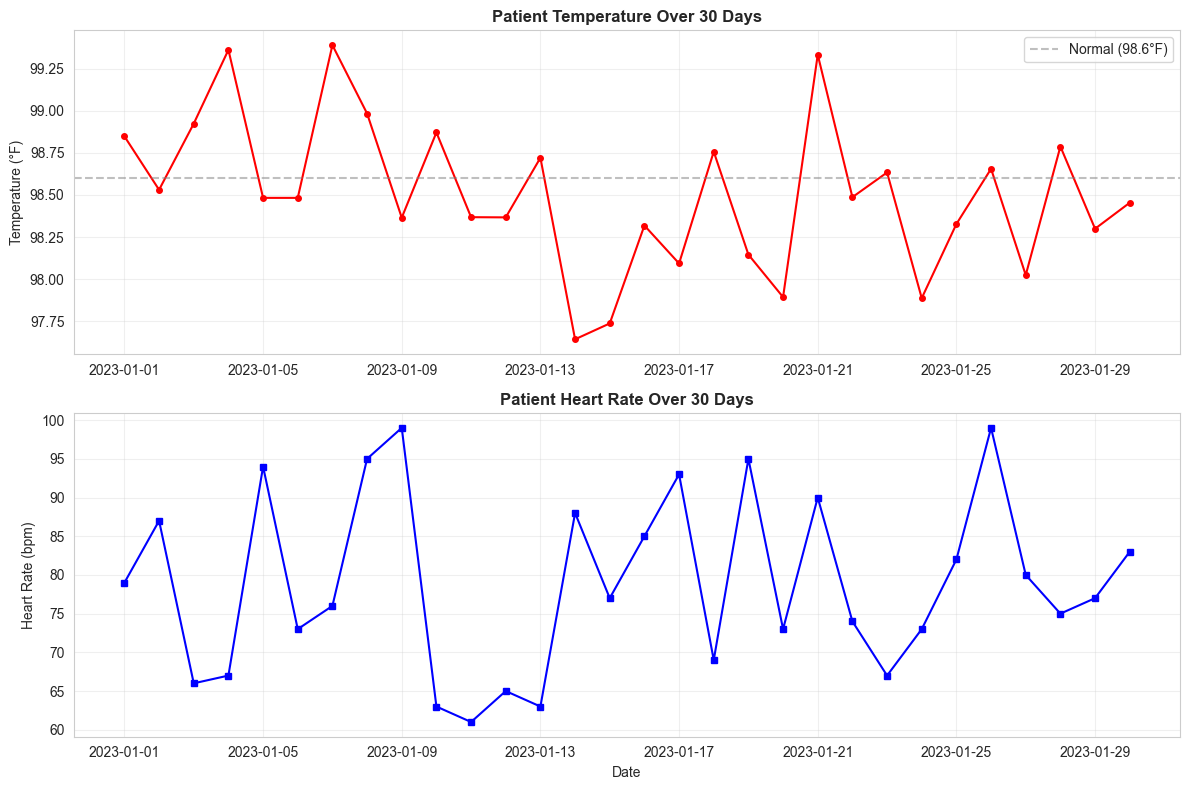

In [5]:
# Visualize the vital signs time series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Temperature over time
axes[0].plot(
    vital_signs.index,
    vital_signs["temperature"],
    marker="o",
    markersize=4,
    linewidth=1.5,
    color="red",
)
axes[0].axhline(
    y=98.6, color="gray", linestyle="--", alpha=0.5, label="Normal (98.6°F)"
)
axes[0].set_title(
    "Patient Temperature Over 30 Days", fontsize=12, fontweight="bold"
)
axes[0].set_ylabel("Temperature (°F)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heart rate over time
axes[1].plot(
    vital_signs.index,
    vital_signs["heart_rate"],
    marker="s",
    markersize=4,
    linewidth=1.5,
    color="blue",
)
axes[1].set_title(
    "Patient Heart Rate Over 30 Days", fontsize=12, fontweight="bold"
)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Heart Rate (bpm)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Date Range Generation for Medical Schedules

Different medical monitoring schedules require different date ranges. pandas provides flexible date range generation that handles business days, custom frequencies, and various time intervals.

In [6]:
# Different date range types for clinical data
print("=== Medical Schedule Date Ranges ===\n")

# Daily monitoring (vital signs)
daily_monitoring = pd.date_range("2023-01-01", "2023-01-10", freq="D")
print(f"Daily monitoring: {len(daily_monitoring)} days")
print(daily_monitoring)

# Weekly lab tests (Mondays)
weekly_labs = pd.date_range("2023-01-01", "2023-03-01", freq="W-MON")
print(f"\nWeekly lab tests (Mondays): {len(weekly_labs)} dates")
print(weekly_labs)

# Monthly checkups (first of month)
monthly_checkups = pd.date_range("2023-01-01", "2023-12-01", freq="MS")
print(f"\nMonthly checkups: {len(monthly_checkups)} dates")
print(monthly_checkups)

# Quarterly assessments (quarter start)
quarterly_assessments = pd.date_range("2023-01-01", "2023-12-31", freq="QS")
print(f"\nQuarterly assessments: {len(quarterly_assessments)} dates")
print(quarterly_assessments)

# Business days only (clinic visits)
clinic_visits = pd.bdate_range("2023-01-01", "2023-01-31")
print(f"\nClinic visits (business days in January): {len(clinic_visits)} days")
print(clinic_visits[:5])

=== Medical Schedule Date Ranges ===

Daily monitoring: 10 days
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

Weekly lab tests (Mondays): 9 dates
DatetimeIndex(['2023-01-02', '2023-01-09', '2023-01-16', '2023-01-23',
               '2023-01-30', '2023-02-06', '2023-02-13', '2023-02-20',
               '2023-02-27'],
              dtype='datetime64[ns]', freq='W-MON')

Monthly checkups: 12 dates
DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')

Quarterly assessments: 4 dates
DatetimeIndex(['2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

Clinic

**Practical note**: The frequency codes (`'D'` for daily, `'W-MON'` for weekly on Mondays, `'MS'` for month start) are standardized in pandas and make it easy to generate complex schedules. Business day ranges (`bdate_range`) automatically exclude weekends, which is essential for clinical scheduling.

### Frequency Inference

Sometimes you receive time series data and need to determine its frequency. pandas can automatically infer the frequency, which is useful for validating data quality and understanding the temporal structure of your dataset.

In [7]:
# Create time series with inferred frequency
dates = pd.date_range("2023-01-01", periods=100, freq="D")
daily_temperature = pd.Series(np.random.normal(98.6, 0.5, 100), index=dates)

# Infer frequency
freq = pd.infer_freq(daily_temperature.index)
print(f"Inferred frequency: {freq}")

# Convert to different frequency (daily to weekly)
weekly_temperature = daily_temperature.asfreq("W")
print(f"Weekly frequency: {pd.infer_freq(weekly_temperature.index)}")
print(f"\nWeekly data shape: {weekly_temperature.shape}")

# Resample to monthly (average monthly temperature)
monthly_temperature = daily_temperature.resample("ME").mean()
print(f"Monthly frequency: {pd.infer_freq(monthly_temperature.index)}")
print(f"\nMonthly data shape: {monthly_temperature.shape}")

Inferred frequency: D
Weekly frequency: W-SUN

Weekly data shape: (15,)
Monthly frequency: ME

Monthly data shape: (4,)


When working with real-world data, you might not know the frequency upfront. The `infer_freq()` function helps you understand the data structure. The `asfreq()` method converts frequency without aggregation (often creating missing values), while `resample()` aggregates data to the new frequency.

## Part 3: Time Series Indexing with Patient Data

One of the most powerful features of pandas DatetimeIndex is intuitive time-based selection. You can select data using date strings that feel natural - like `'2023-01'` for all of January or `'2023-01-01':'2023-01-31'` for a date range.

### Basic Time Series Selection

Time-based selection is one of the most common operations in time series analysis. pandas makes this intuitive by accepting date strings in various formats.

In [8]:
# Create a year of patient data
dates = pd.date_range("2023-01-01", periods=365, freq="D")
patient_weight = pd.Series(
    70 + np.cumsum(np.random.randn(365) * 0.1), index=dates
)

# Select specific date
print("Weight on January 1, 2023:")
print(f"{patient_weight['2023-01-01']:.2f} kg")

# Select date range (first week)
print("\nFirst week of January:")
print(patient_weight["2023-01-01":"2023-01-07"])

# Select entire month
january_data = patient_weight["2023-01"]
print(f"\nJanuary 2023 data shape: {january_data.shape}")
print(f"January average weight: {january_data.mean():.2f} kg")

# Select entire year
year_data = patient_weight["2023"]
print(f"\n2023 data shape: {year_data.shape}")
print(f"2023 average weight: {year_data.mean():.2f} kg")
print(f"2023 weight range: {year_data.min():.2f} - {year_data.max():.2f} kg")

Weight on January 1, 2023:
70.06 kg

First week of January:
2023-01-01    70.063424
2023-01-02    70.369534
2023-01-03    70.237677
2023-01-04    70.309715
2023-01-05    70.341304
2023-01-06    70.347232
2023-01-07    70.438284
Freq: D, dtype: float64

January 2023 data shape: (31,)
January average weight: 70.46 kg

2023 data shape: (365,)
2023 average weight: 70.01 kg
2023 weight range: 68.75 - 70.95 kg


Notice how pandas interprets natural date strings. `'2023-01'` selects all of January 2023, and `'2023'` selects the entire year. This intuitive syntax makes time series analysis much more readable than traditional indexing.

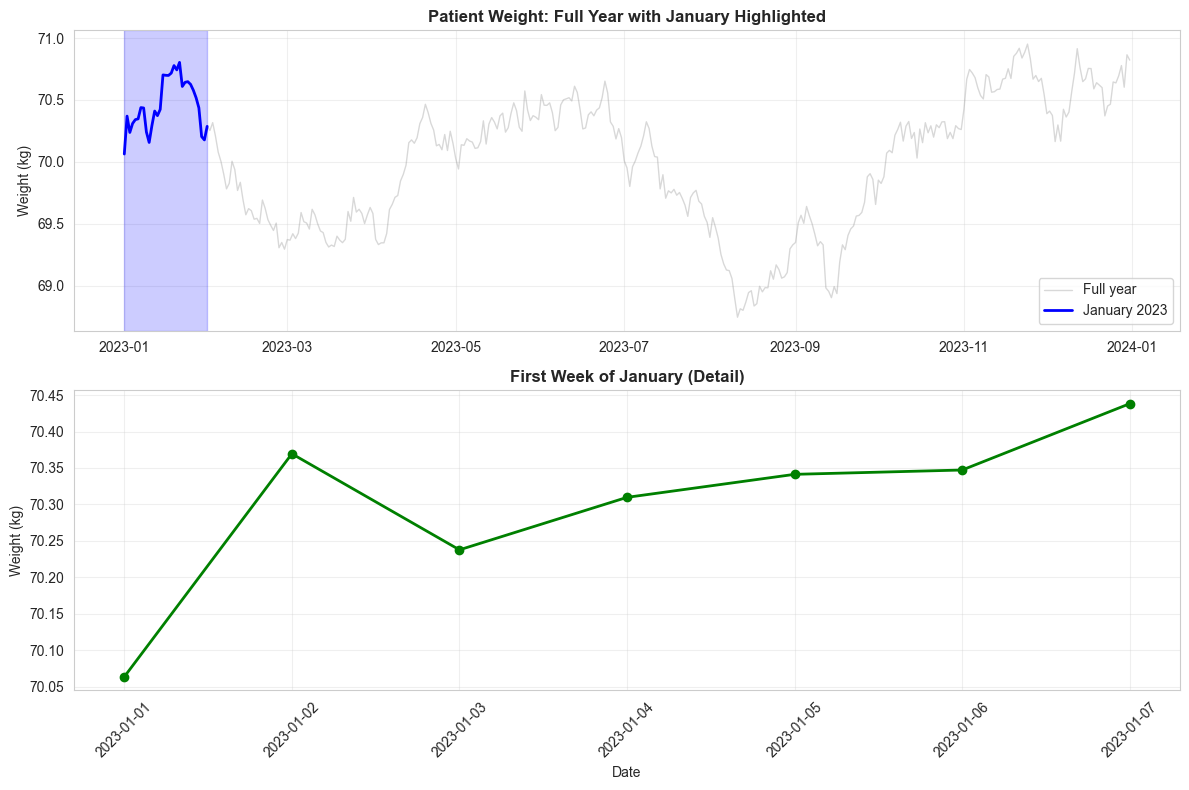

In [9]:
# Visualize time series selection
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Full year with selected periods highlighted
axes[0].plot(
    patient_weight.index,
    patient_weight.values,
    alpha=0.3,
    linewidth=1,
    color="gray",
    label="Full year",
)
axes[0].plot(
    january_data.index,
    january_data.values,
    linewidth=2,
    color="blue",
    label="January 2023",
)
axes[0].axvspan(
    january_data.index[0], january_data.index[-1], alpha=0.2, color="blue"
)
axes[0].set_title(
    "Patient Weight: Full Year with January Highlighted",
    fontsize=12,
    fontweight="bold",
)
axes[0].set_ylabel("Weight (kg)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# First week detail
first_week = patient_weight["2023-01-01":"2023-01-07"]
axes[1].plot(
    first_week.index,
    first_week.values,
    marker="o",
    markersize=6,
    linewidth=2,
    color="green",
)
axes[1].set_title(
    "First Week of January (Detail)", fontsize=12, fontweight="bold"
)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Weight (kg)")
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Advanced Time Series Selection

For high-frequency data (like hourly ICU monitoring), you can select data based on time of day, not just dates. This is incredibly useful for analyzing patterns within days.

In [10]:
# Create hourly ICU monitoring data
hourly_dates = pd.date_range("2023-01-01", periods=24 * 7, freq="h")
icu_data = pd.DataFrame(
    {
        "heart_rate": np.random.randint(60, 100, 24 * 7),
        "blood_pressure": np.random.randint(90, 140, 24 * 7),
        "oxygen_saturation": np.random.randint(95, 100, 24 * 7),
    },
    index=hourly_dates,
)

# Select business hours (9 AM to 5 PM)
business_hours = icu_data.between_time("09:00", "17:00")
print(f"Business hours data shape: {business_hours.shape}")
print("\nBusiness hours sample:")
print(business_hours.head())

# Select specific time (noon readings)
noon_readings = icu_data.at_time("12:00")
print(f"\nNoon readings (7 days):")
print(noon_readings)

# Select first and last periods using .loc
print(f"\nFirst 3 days:")
first_3_days = icu_data.loc[: icu_data.index.min() + pd.Timedelta(days=2)]
print(first_3_days.head())

print(f"\nLast 3 days:")
last_3_days = icu_data.loc[icu_data.index.max() - pd.Timedelta(days=2) :]
print(last_3_days.tail())

Business hours data shape: (63, 3)

Business hours sample:
                     heart_rate  blood_pressure  oxygen_saturation
2023-01-01 09:00:00          73             115                 98
2023-01-01 10:00:00          97             130                 96
2023-01-01 11:00:00          96             124                 96
2023-01-01 12:00:00          70             114                 99
2023-01-01 13:00:00          95             115                 99

Noon readings (7 days):
                     heart_rate  blood_pressure  oxygen_saturation
2023-01-01 12:00:00          70             114                 99
2023-01-02 12:00:00          94             117                 99
2023-01-03 12:00:00          78             138                 95
2023-01-04 12:00:00          99             121                 95
2023-01-05 12:00:00          64             136                 96
2023-01-06 12:00:00          70             108                 97
2023-01-07 12:00:00          68             1

The `between_time()` and `at_time()` methods make it straightforward to compare nighttime vs. daytime vital signs or analyze patterns during specific hours.

## Part 4: Time Zone Handling for Multi-Site Studies

In multi-site clinical trials or global health surveillance, time zones become critical. The same event recorded at different sites needs to be aligned to a common timezone for analysis. pandas provides robust timezone handling.

### Basic Time Zone Operations

Timezone-aware datetime objects include information about which timezone they represent. This allows accurate conversion between timezones and prevents errors in temporal analysis.

In [11]:
# Create timezone-aware datetime (clinical trial with multiple sites)
utc_time = pd.Timestamp.now(tz="UTC")
print(f"UTC time: {utc_time}")

# Convert to different timezone (US Eastern)
eastern_time = utc_time.tz_convert("US/Eastern")
print(f"Eastern time: {eastern_time}")

# Create timezone-aware DataFrame (multi-site clinical trial)
site_data = pd.DataFrame(
    {"patient_id": ["P001", "P002", "P003"], "value": np.random.randn(3)},
    index=pd.date_range("2023-01-01", periods=3, freq="D"),
)

# Localize to UTC (standardize all sites)
site_data.index = site_data.index.tz_localize("UTC")
print("\nSite data (UTC):")
print(site_data)

# Convert to Eastern time (site location)
site_data.index = site_data.index.tz_convert("US/Eastern")
print("\nSite data (Eastern):")
print(site_data)

UTC time: 2025-11-12 05:05:46.344826+00:00
Eastern time: 2025-11-12 00:05:46.344826-05:00

Site data (UTC):
                          patient_id     value
2023-01-01 00:00:00+00:00       P001  0.494567
2023-01-02 00:00:00+00:00       P002  0.082284
2023-01-03 00:00:00+00:00       P003  1.065480

Site data (Eastern):
                          patient_id     value
2022-12-31 19:00:00-05:00       P001  0.494567
2023-01-01 19:00:00-05:00       P002  0.082284
2023-01-02 19:00:00-05:00       P003  1.065480


When analyzing data from multiple clinical trial sites, you must standardize timestamps to a common timezone (typically UTC). The `tz_localize()` function adds timezone information to naive datetime objects, while `tz_convert()` converts between timezones.

### Multiple Time Zones

Real-world clinical trials often involve sites across multiple timezones. Understanding how to convert between them is essential for accurate temporal analysis.

In [12]:
# Clinical trial sites in different time zones
sites = {
    "UTC": "UTC",
    "New York": "US/Eastern",
    "London": "Europe/London",
    "Tokyo": "Asia/Tokyo",
    "Sydney": "Australia/Sydney",
}

print("=== Multi-Site Clinical Trial Time Zones ===")
base_time = pd.Timestamp("2023-01-01 12:00:00", tz="UTC")

for site_name, tz in sites.items():
    converted_time = base_time.tz_convert(tz)
    print(f"{site_name:12} ({tz:20}): {converted_time}")

=== Multi-Site Clinical Trial Time Zones ===
UTC          (UTC                 ): 2023-01-01 12:00:00+00:00
New York     (US/Eastern          ): 2023-01-01 07:00:00-05:00
London       (Europe/London       ): 2023-01-01 12:00:00+00:00
Tokyo        (Asia/Tokyo          ): 2023-01-01 21:00:00+09:00
Sydney       (Australia/Sydney    ): 2023-01-01 23:00:00+11:00


When a patient in New York has an event at 2 PM Eastern time, and a patient in Tokyo has the same event at 2 PM Tokyo time, these are actually different moments in time. Converting everything to UTC ensures accurate temporal comparisons.

## Part 5: Real-World Example - Patient Monitoring Analysis

Now let's combine everything we've learned into a realistic patient monitoring scenario. This demonstrates how datetime operations, indexing, and timezone handling work together in practice. We'll also use `diff()` and `pct_change()` to analyze changes over time.

### Load and Prepare Patient Data

In [13]:
# Simulate patient monitoring data (daily vital signs for 1 year)
print("=== Patient Monitoring Data Analysis ===\n")

# Create monitoring schedule (daily for 1 year)
monitoring_dates = pd.date_range("2023-01-01", periods=365, freq="D")

# Generate realistic patient data
np.random.seed(42)
patient_data = pd.DataFrame(
    {
        "temperature": np.random.normal(98.6, 0.5, 365),
        "heart_rate": np.random.randint(60, 100, 365),
        "blood_pressure_systolic": np.random.randint(110, 140, 365),
        "blood_pressure_diastolic": np.random.randint(70, 90, 365),
        "weight": 70 + np.cumsum(np.random.randn(365) * 0.1),
    },
    index=monitoring_dates,
)

print(f"Patient data shape: {patient_data.shape}")
print(f"Date range: {patient_data.index.min()} to {patient_data.index.max()}")
print(f"\nSample data:")
print(patient_data.head())

=== Patient Monitoring Data Analysis ===

Patient data shape: (365, 5)
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00

Sample data:
            temperature  heart_rate  blood_pressure_systolic  \
2023-01-01    98.848357          97                      128   
2023-01-02    98.530868          65                      117   
2023-01-03    98.923844          91                      119   
2023-01-04    99.361515          80                      129   
2023-01-05    98.482923          75                      124   

            blood_pressure_diastolic     weight  
2023-01-01                        75  69.959878  
2023-01-02                        77  70.122530  
2023-01-03                        71  69.874400  
2023-01-04                        81  69.925784  
2023-01-05                        82  69.900103  


### Time Series Analysis

Using time series operations, we can calculate daily changes, identify trends, and detect significant changes in patient metrics. The `diff()` function (which uses shifting internally) calculates day-over-day changes, while `pct_change()` calculates percentage changes.

In [14]:
# Basic time series analysis
print("=== Time Series Analysis ===\n")

# Select specific periods
january = patient_data.loc["2023-01"]
print(f"January statistics:")
print(january[["temperature", "heart_rate"]].describe())

# Monthly averages
monthly_avg = patient_data.resample("ME").mean()
print(f"\nMonthly averages:")
print(monthly_avg[["temperature", "heart_rate", "weight"]].head())

# Calculate changes using diff() (which uses shifting internally)
patient_data["weight_change"] = patient_data["weight"].diff()
patient_data["heart_rate_change"] = patient_data["heart_rate"].diff()

# Identify significant changes
significant_weight_changes = patient_data[
    abs(patient_data["weight_change"]) > 1.0
]
print(
    f"\nSignificant weight changes (>1 kg): {len(significant_weight_changes)} days"
)
print(significant_weight_changes[["weight", "weight_change"]].head())

# Calculate percentage changes
patient_data["weight_pct_change"] = patient_data["weight"].pct_change()
print(f"\nWeight percentage changes (sample):")
print(patient_data[["weight", "weight_change", "weight_pct_change"]].head(10))

=== Time Series Analysis ===

January statistics:
       temperature  heart_rate
count    31.000000   31.000000
mean     98.499256   78.741935
std       0.443996   10.884141
min      97.643360   60.000000
25%      98.299414   70.500000
50%      98.482923   77.000000
75%      98.772486   88.500000
max      99.389606   97.000000

Monthly averages:
            temperature  heart_rate     weight
2023-01-31    98.499256   78.741935  70.182454
2023-02-28    98.528416   79.928571  70.706002
2023-03-31    98.621969   79.645161  71.537625
2023-04-30    98.589874   78.933333  72.233846
2023-05-31    98.558093   79.419355  71.968750

Significant weight changes (>1 kg): 0 days
Empty DataFrame
Columns: [weight, weight_change]
Index: []

Weight percentage changes (sample):
               weight  weight_change  weight_pct_change
2023-01-01  69.959878            NaN                NaN
2023-01-02  70.122530       0.162652           0.002325
2023-01-03  69.874400      -0.248129          -0.003539
2023-0

The `diff()` function calculates day-over-day changes by comparing each value with the previous value (using `shift(1)` internally). This is essential for identifying trends and anomalies. When combined with threshold checks, this helps identify significant changes in patient metrics. The `pct_change()` function calculates percentage changes, which is useful for understanding relative changes.

### Visualization

Visualizing time series data helps identify patterns, trends, and anomalies that might not be obvious from summary statistics.

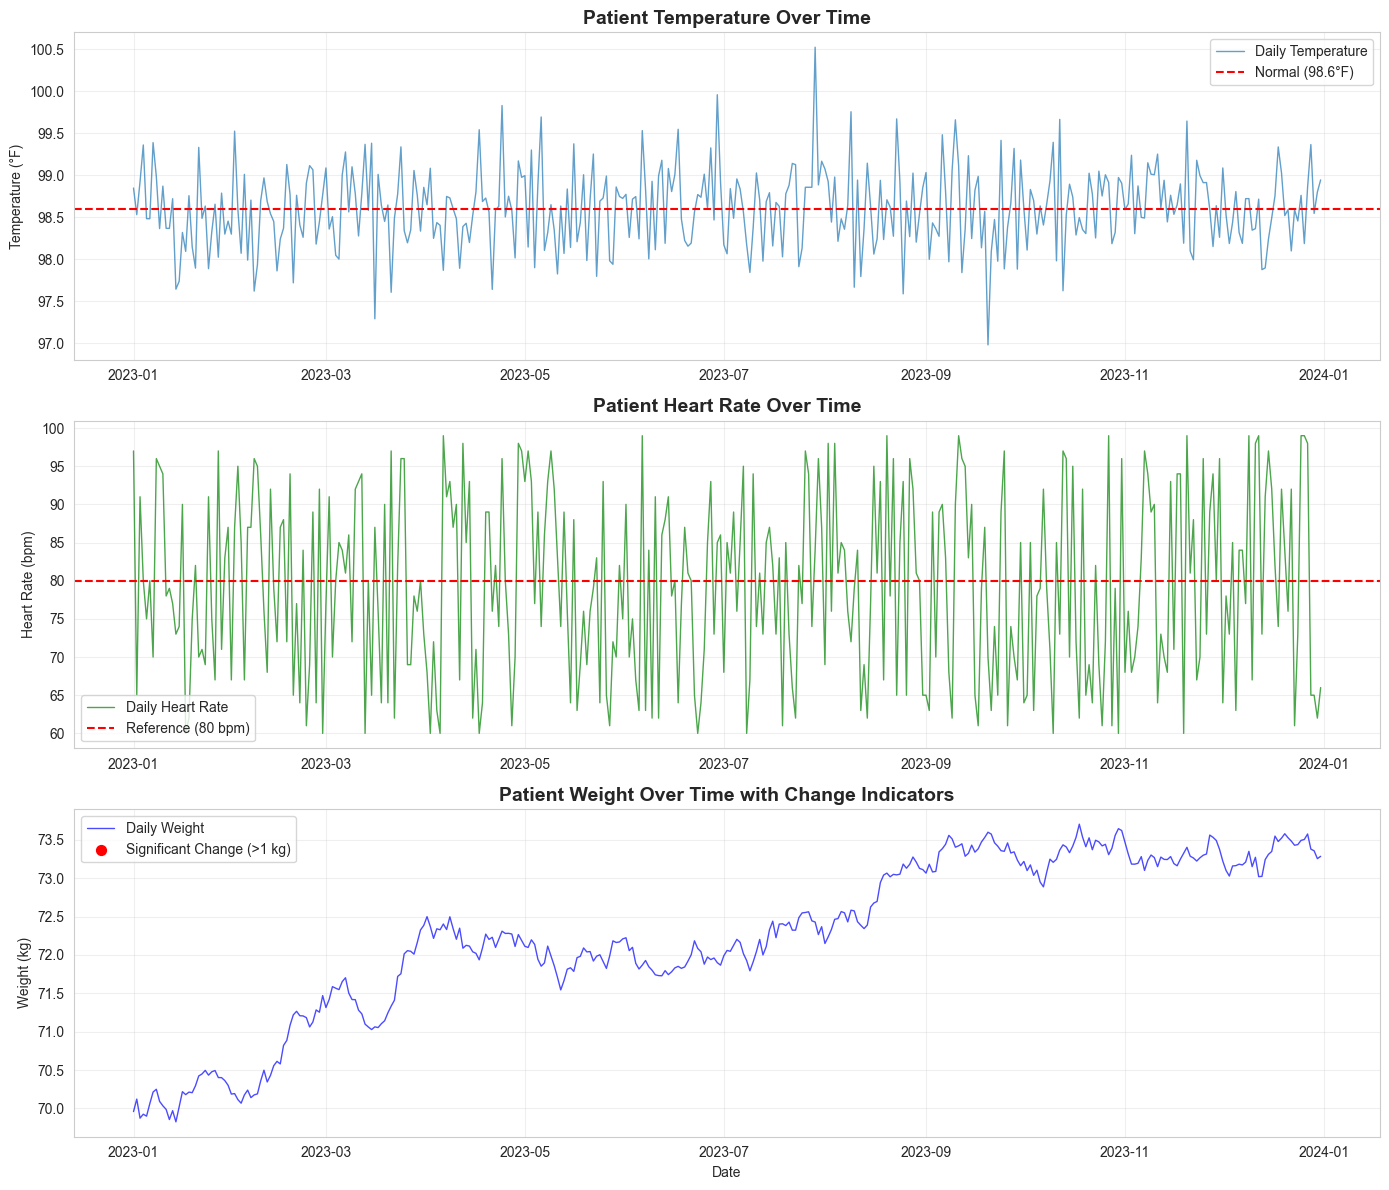

In [15]:
# Create comprehensive time series visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Temperature over time
axes[0].plot(
    patient_data.index,
    patient_data["temperature"],
    alpha=0.7,
    linewidth=1,
    label="Daily Temperature",
)
axes[0].axhline(y=98.6, color="red", linestyle="--", label="Normal (98.6°F)")
axes[0].set_title(
    "Patient Temperature Over Time", fontsize=14, fontweight="bold"
)
axes[0].set_ylabel("Temperature (°F)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heart rate over time
axes[1].plot(
    patient_data.index,
    patient_data["heart_rate"],
    alpha=0.7,
    linewidth=1,
    color="green",
    label="Daily Heart Rate",
)
axes[1].axhline(y=80, color="red", linestyle="--", label="Reference (80 bpm)")
axes[1].set_title(
    "Patient Heart Rate Over Time", fontsize=14, fontweight="bold"
)
axes[1].set_ylabel("Heart Rate (bpm)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Weight over time with change indicators
axes[2].plot(
    patient_data.index,
    patient_data["weight"],
    alpha=0.7,
    linewidth=1,
    color="blue",
    label="Daily Weight",
)
# Mark significant changes
significant_dates = significant_weight_changes.index
significant_values = significant_weight_changes["weight"]
axes[2].scatter(
    significant_dates,
    significant_values,
    color="red",
    s=50,
    zorder=5,
    label="Significant Change (>1 kg)",
)
axes[2].set_title(
    "Patient Weight Over Time with Change Indicators",
    fontsize=14,
    fontweight="bold",
)
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Weight (kg)")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Time series plots reveal patterns that summary statistics miss - like seasonal trends, sudden changes, or gradual drifts. The visualization above combines raw data, reference lines, and highlighted significant changes to provide comprehensive insight.
